In [2]:
# @hidden_cell
from IPython.display import display
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

housing_df = pd.read_csv("../../data/Housing.csv")

# Model Complexity and Overfitting

Now that we have an intutitive undestanding of the relationship between a model's complexity and generalization ability, let us look at an example to demonstrate these ideas and how overfitting manifests during model building. Note that for now we are working within the premise of a regression problem where we attempt to predict real-valued outcomes. 

We will begin with a toy dataset, that exhibit some non-linearity in the data, obtained by some simple simulation. We separate part of the data for testing the model since, as we have just discussed in the introductory section, evidence of overfitting can be found when the model makes predictions on previously unseen datapoints. We will then attempt to fit models of varying complexity on this data and account for their performance.

To test for model performance, we will use the fitted models to make prediction on the test data and use the root mean squared error (**RMSE**) as the metric of choice to get an estimate of the generalization error that models make. This metric is a quantification of the average deviation of the model's prediction from the actual outcome value. We also compute the $R^2$ score upon the test predictions to estimate the proportion of variance in the outcome variable that is explained by the polynomial features of the model.

<!-- a statistical measure that shows the proportion of the variance in the dependent variable that is explained by the independent variables in the model-->

In [3]:
np.random.seed(42)
m = 100
x_all = 6 * np.random.rand(200) - 3
np.random.shuffle(x_all)

x = np.sort(x_all[:100]).reshape(m,1)
x_test = np.sort(x_all[100:]).reshape(m,1)

y = 0.5 * x**2 + x + 2 + np.random.randn(m,1)
y_test = 0.5 * x_test**2 + x_test + 2 + np.random.randn(m,1)

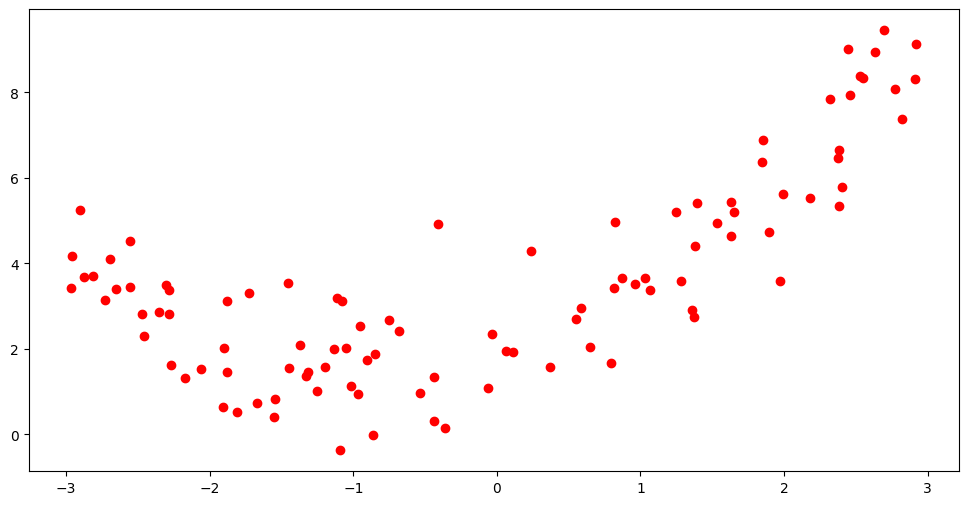

In [4]:
plt.figure(figsize=(12, 6))  
plt.scatter(x,y,color="red")

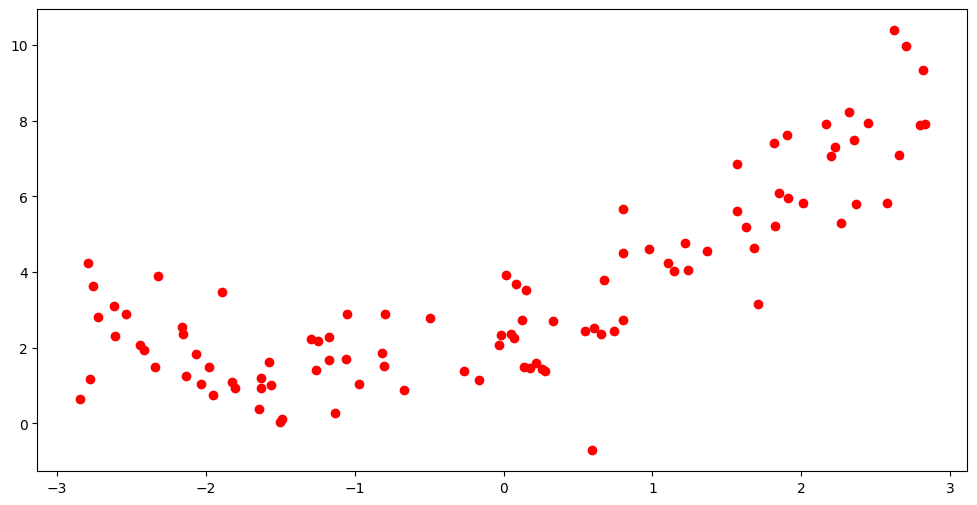

In [5]:
plt.figure(figsize=(12, 6))  
plt.scatter(x_test,y_test,color="red")

Looking at the data it is obvious this is non linear. Hence we want to transform the $X$ values to higher order features before using them to fit a basic linear regression model. As mentioned in the [feature engineering chapter](../../21/1/feature_engineering.ipynb), this type of feature expansion is called a polynomial transformation. The matrix of features following a transformation to a polynomial of degree $d$ looks like:
> $F_d(x) = \left[1, x, x^2, \ldots, x^d \right]$

The complexity of the underlying model in this case depends on the highest degree of polynomial accommodated within the regression model.


In [6]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

test_results = []
x_new=np.linspace(-3, 3, 100).reshape(100, 1)

The first is a simple linear model using a first order polynomial. That involves fitting a line by directly using the $X$ values available:
> $y = ax +b$

$a$ and $b$ are the coefficient and bias terms respectively.

In [7]:
poly1 = PolynomialFeatures(degree=1, include_bias=False)
#this created an array of polynomial feature (here only degree 1 so only 1 column)
x_poly1 = poly1.fit_transform(x)

#fitting a line
lin_reg = LinearRegression()
lin_reg.fit(x_poly1, y)
a = lin_reg.coef_[0][0]
b = lin_reg.intercept_[0]
print('a:', a, 'b:', b)
print(f"Fitted Line: {a:.2f}x+{b:.2f}")

a: 0.8780810762959749 b: 3.6993129655551034
Fitted Line: 0.88x+3.70


We will plot this line to test the nature of the fit. As we can see, a first order polynomial is a suboptimal fit for non-linear data. This is an example of what we call an **underfitted** model -- a model that doesnt have the necesarry complexity to well generalize the data.

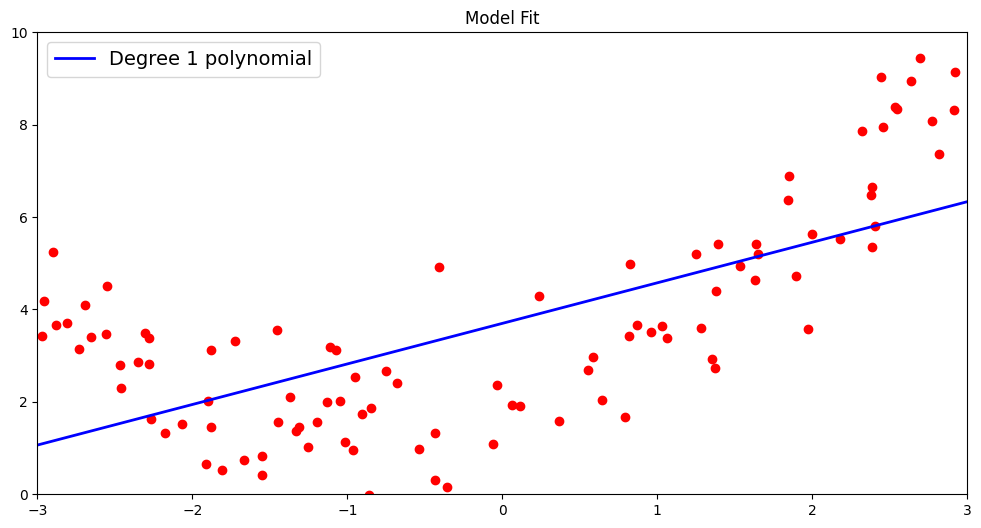

In [8]:
x_new_poly = poly1.transform(x_new)
y_new = lin_reg.predict(x_new_poly)

plt.figure(figsize=(12, 6))  
plt.scatter(x, y, color="red")
plt.plot(x_new, y_new, "b-", linewidth=2, label="Degree 1 polynomial")
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.title('Model Fit')
plt.show()

To gauge the fit of the model on previously unseen test data, we make predictions using the fitted line and also report the $R^2$ score and root mean squared metric by comparing the predicted and actual outcomes for our test data.

In [9]:
y_train_pred = lin_reg.predict(x_poly1)
train_r2 = r2_score(y, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y, y_train_pred))

x_poly1_test = poly1.transform(x_test)
y_test_pred = lin_reg.predict(x_poly1_test)
test_r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'TEST R^2: {test_r2}')
test_results.append({'Polynomial Degree': 1, 'Train R^2 Score': train_r2, 'Test R^2 Score': test_r2, 'Train RMSE': train_rmse, 'Test RMSE': rmse})

TEST R^2: 0.5608611832747157


To address the issue of underfitting with the previous model, we need to use higher order polynomials that can better model the complex spread of the data. Let us move to a third order polynomial. This involves fitting the following function:
>$y = a_{1}x +a_{2}x^{2} +a_{3}x^{3} +b$

This model includes three coefficients $a_{1}$, $a_{2}$, $a_{3}$ and a bias term $b$. As we can see by plotting the data alongside the underlying model function, the fit is much improved by increasing the degree of the polynomial. A degree 3 polynomial better captures the non-linearity of the data even if it is not perfect.

Features of the first observation: [[-1.55915082  2.05866433 -2.36595779]]


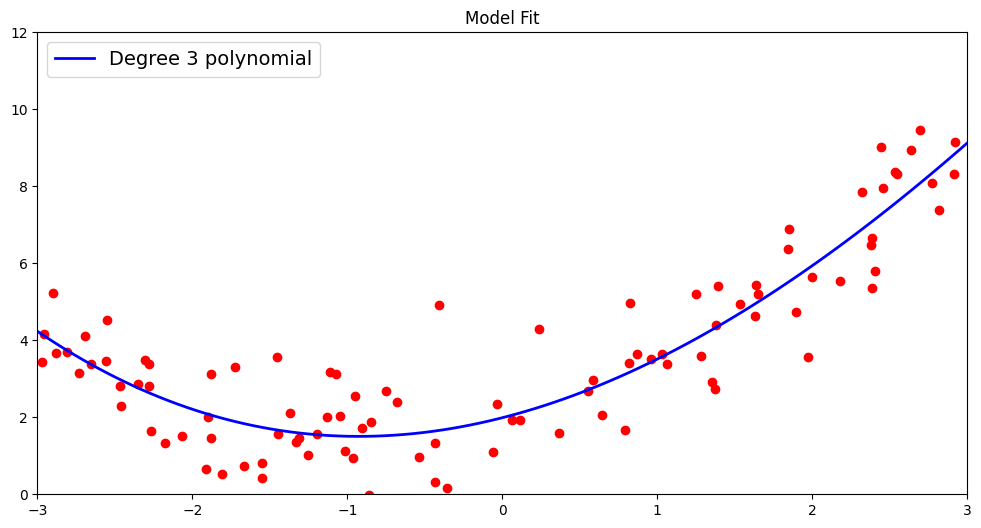

In [10]:
#this creates an array for standardized polynomial features (here degree 3)
poly3 = PolynomialFeatures(degree=3, include_bias=False)
scaler = StandardScaler()
x_poly3 = scaler.fit_transform(poly3.fit_transform(x))
# features for first observation
print("Features of the first observation:",x_poly3[:1]) 

#fitting a linear model on higher order features
lin_reg = LinearRegression()
lin_reg.fit(x_poly3, y)

x_new_poly = scaler.transform(poly3.transform(x_new))
y_new = lin_reg.predict(x_new_poly)

plt.figure(figsize=(12, 6))  
plt.scatter(x, y, color="red")
plt.plot(x_new, y_new, "b-", linewidth=2, label="Degree 3 polynomial")
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 12])
plt.title('Model Fit')
plt.show()

Like the previous model, we report the $R^2$ score and root mean squared metric by comparing the predicted and actual outcomes for our test data.

In [11]:
y_train_pred = lin_reg.predict(x_poly3)
train_r2 = r2_score(y, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y, y_train_pred))

x_poly3_test = scaler.transform(poly3.transform(x_test))
y_test_pred = lin_reg.predict(x_poly3_test)
test_r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'TEST R^2: {test_r2}')
test_results.append({'Polynomial Degree': 3, 'Train R^2 Score': train_r2, 'Test R^2 Score': test_r2, 'Train RMSE': train_rmse, 'Test RMSE': rmse})

TEST R^2: 0.7870600996903524


Now what happens if we try to fit an even higher-order polynomial, say degree 30? As we can see, the fitted curve attempts to capture some more of the points that were missed out by the degree 3 polynomial, thereby yielding a better fit on the training data.

Features of the first observation: [[-1.55915082  2.05866433 -2.36595779  2.6772171  -2.91462656  3.15733221
  -3.34401533  3.54292672 -3.69404808  3.85995808 -3.98673531  4.12779132
  -4.23752764  4.36012751 -4.45734198  4.56623907 -4.65373099  4.75233149
  -4.8318967   4.92261121 -4.9954656   5.08000412 -5.14702124  5.22660857
  -5.2884514   5.36397561 -5.42117091  5.4932839  -5.54626545  5.61545113]]


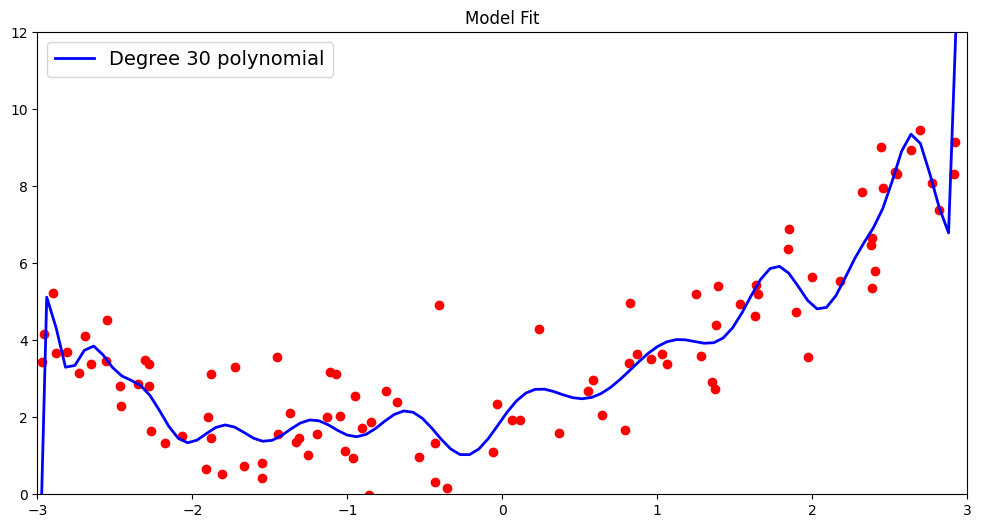

In [12]:
#this creates an array for standardized polynomial features (here degree 30)
poly30 = PolynomialFeatures(degree=30, include_bias=False)
scaler = StandardScaler()
x_poly30 = scaler.fit_transform(poly30.fit_transform(x))
# features for first observation
print("Features of the first observation:",x_poly30[:1]) 

#fitting a linear model on higher order features
lin_reg = LinearRegression()
lin_reg.fit(x_poly30, y)

x_new_poly = scaler.transform(poly30.transform(x_new))
y_new = lin_reg.predict(x_new_poly)

plt.figure(figsize=(12, 6))  
plt.scatter(x, y, color="red")
plt.plot(x_new, y_new, "b-", linewidth=2, label="Degree 30 polynomial")
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 12])
plt.title('Model Fit')
plt.show()

We report the $R^2$ score and root mean squared metric by comparing the predicted and actual outcomes for our test data.

In [13]:
y_train_pred = lin_reg.predict(x_poly30)
train_r2 = r2_score(y, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y, y_train_pred))


x_poly30_test = scaler.transform(poly30.transform(x_test))
y_test_pred = lin_reg.predict(x_poly30_test)
test_r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'TEST R^2: {test_r2}')
test_results.append({'Polynomial Degree': 30, 'Train R^2 Score': train_r2, 'Test R^2 Score': test_r2, 'Train RMSE': train_rmse, 'Test RMSE': rmse})

TEST R^2: 0.7697544745303144


Could we go higher and use more higher order polynomial features? Let us try fitting a 50 degree polynomial and test it's ramifications on the test data!

Features of the first observation: [[-1.55915082  2.05866433 -2.36595779  2.6772171  -2.91462656  3.15733221
  -3.34401533  3.54292672 -3.69404808  3.85995808 -3.98673531  4.12779132
  -4.23752764  4.36012751 -4.45734198  4.56623907 -4.65373099  4.75233149
  -4.8318967   4.92261121 -4.9954656   5.08000412 -5.14702124  5.22660857
  -5.2884514   5.36397561 -5.42117091  5.4932839  -5.54626545  5.61545113
  -5.66458616  5.73120732 -5.77681337  5.8411444  -5.88350062  5.9457508
  -5.98510589  6.04543625 -6.08201413  6.14054983 -6.17455385  6.23139335
  -6.26300947  6.31823144 -6.34763072  6.4012992  -6.42863968  6.48080804
  -6.50623623  6.55695013]]


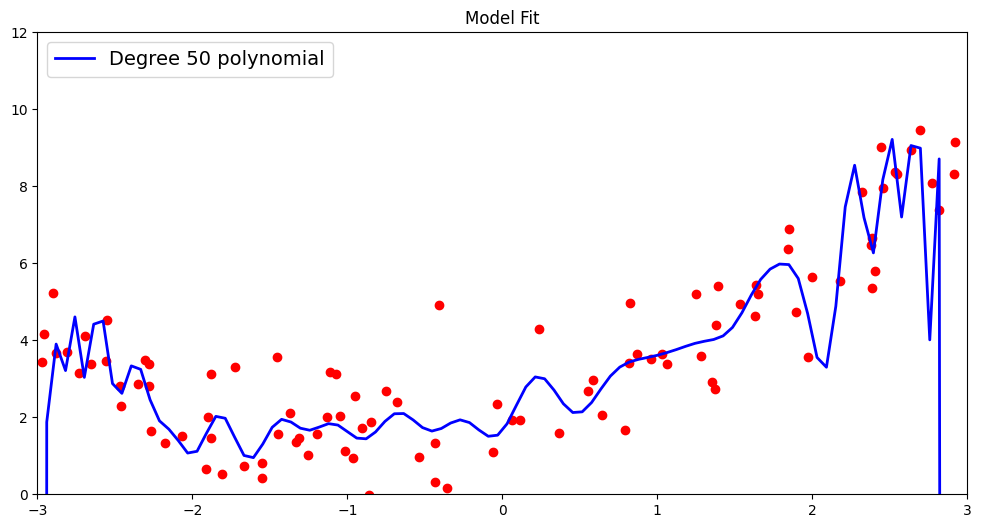

In [14]:
#this creates an array for standardized polynomial features (here degree 50)
poly50 = PolynomialFeatures(degree=50, include_bias=False)
scaler = StandardScaler()
x_poly50 = scaler.fit_transform(poly50.fit_transform(x))
# features for first observation
print("Features of the first observation:",x_poly50[:1]) 

#fitting a linear model on higher order features
lin_reg = LinearRegression()
lin_reg.fit(x_poly50, y)

x_new_poly = scaler.transform(poly50.transform(x_new))
y_new = lin_reg.predict(x_new_poly)

plt.figure(figsize=(12, 6))  
plt.scatter(x, y, color="red")
plt.plot(x_new, y_new, "b-", linewidth=2, label="Degree 50 polynomial")
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 12])
plt.title('Model Fit')
plt.show()

Finally, we report the $R^2$ score and root mean squared metric by comparing the actual outcomes for our test data with the predictions made using this very high order polynomial.

In [15]:
y_train_pred = lin_reg.predict(x_poly50)
train_r2 = r2_score(y, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y, y_train_pred))

x_poly50_test = scaler.transform(poly50.transform(x_test))
y_test_pred = lin_reg.predict(x_poly50_test)
test_r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'TEST R^2: {test_r2}')
test_results.append({'Polynomial Degree': 50, 'Train R^2 Score': train_r2, 'Test R^2 Score': test_r2, 'Train RMSE': train_rmse, 'Test RMSE': rmse})

TEST R^2: 0.27024008670544963


Summarizing the results obtained above makes it clear that while the choice of going from a simple linear model to a more complex one was the right idea, increasing model complexity by fitting higher order polynomials ceases to pay off beyond a point. 

In fact, our results clearly show that as the model complexity goes up, we obtain steady improvements in fitting the curve to the training data as evidenced by the increase in the `Train R^2 Score` in the table below. However, the `Test R^2 Score` only goes up from the degree 1 polynomial to the degree 3 polynomial. Beyond that, higher order polynomial functions fitted on the data do not exhibit the improvements in predicting the test data that it shows at the time of training. Hence, the higher order polynomials in this case, beyond degree 3, result in **overfitted** models.

In [16]:
# @hidden_cell
test_results_df = pd.DataFrame(test_results)
display(test_results_df)

,Polynomial Degree,Train R^2 Score,Test R^2 Score,Train RMSE,Test RMSE
0,1,0.457378,0.560861,1.730694,1.631562
1,3,0.817757,0.787060,1.002991,1.136139
2,30,0.851246,0.769754,0.906162,1.181404
3,50,0.867291,0.270240,0.855897,2.103259


In general, complex models typically utilize more parameters to characterize a function that predicts the outcome variable. This is when overfitting can occur.
- *A model that overfits tends to follow the training data, whose predictions it uses to optimize the model and determine values of model parameters, too closely.* However, for most practical purposes, the data available to us also exhibit noise. In trying to mimic the training data and its outcomes, overfitted models also end up mimic the inherent noise.
- *A model that is overfit will not give good predictions for test observations that were not part of the training set.* This results directly from mimicking the noise within the data, alongside the underlying trends that helps predict the outcomes. Noise adds randomness but is not a reproducible phenomenon and does not help us predict outcomes for the test data better. Hence it should not be taken into consideration at the time of model construction even if that entails performing worse at predicting the training data. 


<img align="center" src="model-complexity.jpeg" width="100%"/>

Hence to select the most suitable model for a prediction problem, it is essential to detect possible overfitting.

## Overfitting Treatment

The previous demonstration of overfitting also hints at how we typically incorporate strategies to detect this phenomenon at the time of model construction to choose the most optimal model. In order to address overfitting, we are concerned with any noticeable drop of model performance from training to test. While the actual test data will only be available to the model upon being productionized, we can simulate a test environment by leaving out a portion of the observed data available at the start of model building from being used for training. Instead, this data, that is initially *held out* at the time of training, is used to get an unbiased estimate of the fitted model's generalization capabilities. A dip in performance in the data unused for training reveals us the extent to which the resulting model is overfitted to the training set.

There are a few different ways to approach **data splitting** to detect overfitting during model construction.

### Hold-out set

What we have been demonstrating so far to tackle overfitting is separating out a *validation* or *hold-out* set at the onset of training from the full sample of observed data available to us. Typically we randomize the data prior to splitting to avoid any implicit patterns from overpopulating the training or test split, instead of being evenly distributed across both. Depending on the amount of data available we can do a 70-30 split with the larger split allotted for training. 

Take the previously used housing data for example. As shown in the housing price prediction case study, we split our data into training and holdout partitions, prior to applying steps like feature scaling or standardization. We use the `train_test_split` function from the `model_selection` package of `scikit-learn` and specify the fraction of data the forms the hold-out set using the `test_size` parameter.

In [17]:
feature_list = ['floor_size','bed_room_count','built_year','room_count','garage_size','parking_lot','sold_date','sold_price']
housing_data_df = housing_df[feature_list]
housing_data_prices = housing_df['sold_price']
housing_data_df.head()

,floor_size,bed_room_count,built_year,room_count,garage_size,parking_lot,sold_date,sold_price
0,2068,3,2003,6,768,3,Aug2015,195500
1,3372,3,1999,6,480,2,Dec2015,385000
2,3130,3,1999,7,400,2,Jan2017,188000
3,3991,3,1999,8,400,2,Nov2014,375000
4,1450,2,1999,7,200,1,Jan2015,136000


Here the original data has 106 rows and upon splitting we separate 30% of the data as our hold-out set.

In [18]:
print("Initial Dataset size: "+str(len(housing_data_df))+" rows")
housing_data_df_train, housing_data_df_test, housing_data_prices_train, housing_data_prices_test = train_test_split(housing_data_df, housing_data_prices, test_size=0.3, random_state=42)
print("Training data size: "+str(len(housing_data_df_train))+" rows")
print("Test data size: "+str(len(housing_data_df_test))+" rows")

Initial Dataset size: 106 rows
Training data size: 74 rows
Test data size: 32 rows


The hold-out set approach demonstrated above is conceptually simple and easily implementable. However, it could present with two potential drawbacks:

- Depending on the split, different versions of the hold-out set could include different observations from the data and therefore provide a variable estimate of the test error. To reduce the randomness of the splitting process, we can set the `random_state` parameter in the `train_test_set` to a specific integer value. This will help generate reproducible splits across different executions of the function and thereby generate a stable validation error.
- Regardless of the split ratio, we need to make sure enough data is available for training. Otherwise we risk compromising model generalizability that would anyway result in an underperforming model. Hence this strategy is not appropriate when the initial size of observed samples is limited.

To address both of these issues, we use cross-validation as an alternative strategy.


### Cross-validation

In the absence of a large dataset, reserving an exclusive validation or hold-out set is infeasible as it leaves too little data for effective model training. As a workaround, cross-validation techniques suggest splitting the data into multiple folds or subsets. Over several iterations, one of the subsets is reserved to be the validation fold while the rest are utilized for training. The validation fold remains unavailable during the training process. However, once the model is trained, it is used to estimate model performance. This process is repeated such that each subset serves as the validation fold at least once. The validation error, which is also an estimate for model performance, is the average of validation errors obtained across all folds.

Suppose for a given learning task, we have obtained a dataset $D$ with $n$ observations : $\{(x_{1}, y_{1}),(x_{2}, y_{2}),...,(x_{n}, y_{n})\}$. Broadly we have two types of cross-validation strategies depending on the size of the folds drawn from this dataset:

- **Leave-One-Out Cross Validation**: For this strategy, the validation fold only consists of one of the observations of the dataset while the rest of the observations collectively form the training fold.
For a dataset $D$ with $n$ observations, this involves $n$ iterations over which each individual observation of the dataset is left out of training in the validation fold, while the rest of the observations are used to train the model of choice. Note that for an extremely large $n$, especially with models that have computationally expensive training process, leave-one-out cross-validation involves too many iteration and can involve a large computational overhead.

- **K-fold Cross Validation**: An alternative to the previous approach is $k$-fold cross-validation where the dataset is divided into $k$ folds of approximately equal size. We say approximately because the dataset size $n$ need not be divisible by $k$ which could leave one of the folds smaller in size ($n\%k$) than the others. In fact, leave-one-out cross-validation is a special case of $k$-fold where the size of each individual fold is one. $k$-fold cross-validation is the more common approach since it is computationally more efficient. It also provides stable and more practically reliable performance estimates of a model than the leave-one-out approach since the evaluation here involves testing the model on validation folds that consist of more than a single example.  \
    The $k$-fold cross-validation process with dataset $D$ would proceed as laid down in Algorithm {prf:ref}`kcv-algorithm`.

```{prf:algorithm} K-fold Cross Validation
:label: kcv-algorithm

**Inputs** 
Dataset $D$: $\{(x_{1}, y_{1}),(x_{2}, y_{2}),...,(x_{n}, y_{n})\}$
$k$: number of folds
model: learning algorithm of choice

**Output** Mean cross-validation score $k\_fold\_cv\_score$

1. Shuffle the observations in $D$ to remove any accidental patterns within subsets of observations.
2. Initialize array $cv\_scores$ = []
3. Split $D$ into $k$ subsets approximately of size $D//k$ : $D_{1}$, $D_{1}$, $...$, $D_{k}$
4. **for** $i$ = $1 ... k$:
	1. $val\_set$ = $D_{i}$
	2. $train\_set$ = $D$ - $D_{i}$
	3. model.fit($train\_set.features$, $train\_set.labels$)
	4. $predictions$ = model.predict($val\_set.features$)
	5. $score$ = evaluate($predictions$, $val\_set.labels$)
	6. Append $score$ to $cv\_scores$
5. **end**
6. $k\_fold\_cv\_score$ = average($cv\_scores$)
7. Return $k\_fold\_cv\_score$
```

## Model Selection

All the aforementioned validation approaches, that we have just discussed to treat overfitting, helps control model complexity for a predictions task.
We can use these techniques to select the optimal form of the model. This can refer to the values of model-specific *hyperparameters* like degree of the polynomial for regression tasks. **Hyperparameters** are different from model parameters that are a byproduct of the training process. Instead, these are external parameters that do not directly characterize the model of choice but set the configurations around it. Their values are not learnt directly from the data but are chosen as part of the model selection process using a specific validation strategy. 

The general approach to model selection first separates the available data into training and validation sets. It then conducts an iterative search through a range of hyperparameters and selects the most optimal one which results in the best performing model on the validation set. We can illustrate this process using Algorithm {prf:ref}`model-selection-algorithm`.

```{prf:algorithm} Model Selection with a Validation Set
:label: model-selection-algorithm

**Inputs** 
Dataset $D$: $\{(x_{1}, y_{1}),(x_{2}, y_{2}),...,(x_{n}, y_{n})\}$
model: learning algorithm of choice
$S$: search space for a hyperparameter (e.g., range of values denoting degree of a polynomial)

**Output** 
Best validation score $best\_score$
Optimal hyperparameter value $h\_best$

1. Shuffle the observations in $D$ to remove any accidental patterns within subsets of observations.
2. Split $D$ into two subsets: $D\_train$, $D\_val$.
3. Initialize $best\_score$ = $-\infty$
4. Initialize $h\_best$ = $None$
5. **for** $h\_val \in S$:
	1. Initialize $model$ with hyperparameter $h\_val$
	2. model.fit($D\_train.features$, $D\_train.labels$)
	3. $predictions$ = model.predict($D\_val.features$)
	4. $score$ = evaluate($predictions$, $D\_val.labels$)
	5. **if** $score > best\_score$:
        1. $best\_score$ = $score$
        2. $h\_best$ = $h\_val$
    6. **end**
6. **end**
7. Return $h\_best$, $best\_score$
```

A caveat here lies in the fact that this process requires model complexity to vary discretely. This might not always be the case and there may not be a natural way to order models over a discrete range. 
Rather than searching through a sequence of models of varying complexity, we can fit a large model and apply constraints on the values that our model parameters can assume. In fact, the training process here involves simultaneously optimizing the loss or performance of a model for a predictive task, as well as the constraints around the size of model coefficients. This technique is called ***regularization*** and will be covered in detail in the next section.